In [109]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)
from keras.models import Sequential
from keras.layers import Conv2D, Conv1D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
import os 
import cv2

1.14.0
2.2.4


In [0]:
DataDir = "/content/drive/My Drive/Pocas_categorias/Train_set"

categories = ['Amstel', 'Cruzcampo', 'Estrella_damm', 'Estrella_galicia', 'Franziskaner', 'Heineken','Mahou', 'Pilsen_urquell','Sanmiguel']

'train_datagen = ImageDataGenerator(\n        rescale=1./255,\n        #shear_range=0.2,\n        #zoom_range=0.2,\n        #horizontal_flip=True)\n        featurewise_center=False,               # se pone la media a 0 en todo el dataset\n        samplewise_center=False,                # se pone la media a 0 de la muestra\n        featurewise_std_normalization=False,    # se divide entre la std del dataset\n        samplewise_std_normalization=False,     # se divide cada entrada entre std\n        zca_whitening=False,                    # ZCA whitening, reduccion de dimensiones (similar a PCA)\n        rotation_range=15,                      # se rotan las imagenes aleatoriamente (de 0 a 180 grados)\n        zoom_range=0.1,                         # zoom aleatorio \n        width_shift_range=0.1,                  # cambio aleatorio horizontal (fraccion del ancho total)\n        height_shift_range=0.1,                 # cambio aleatorio vertical (fraccion de la altura total)\n        ho

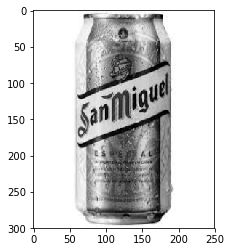

In [112]:
img_ancho = 250
img_alto = 300

for category in categories:
    path = os.path.join(DataDir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array =cv2.resize(img_array, (img_ancho, img_alto))
        plt.imshow(new_array, cmap ='gray')
        plt.show


In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        #shear_range=0.2,
        #zoom_range=0.2,
        #horizontal_flip=True)
        featurewise_center=False,               # se pone la media a 0 en todo el dataset
        samplewise_center=False,                # se pone la media a 0 de la muestra
        featurewise_std_normalization=False,    # se divide entre la std del dataset
        samplewise_std_normalization=False,     # se divide cada entrada entre std
        zca_whitening=False,                    # ZCA whitening, reduccion de dimensiones (similar a PCA)
        rotation_range=15,                      # se rotan las imagenes aleatoriamente (de 0 a 180 grados)
        zoom_range=0.1,                         # zoom aleatorio 
        width_shift_range=0.1,                  # cambio aleatorio horizontal (fraccion del ancho total)
        height_shift_range=0.1,                 # cambio aleatorio vertical (fraccion de la altura total)
        horizontal_flip=False,                  # giro aleatorio horizantal                           
        vertical_flip=False)   

In [114]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Pocas_categorias/Train_set', 
                    target_size=(300, 250), shuffle = True, color_mode='grayscale',batch_size=32)


Found 889 images belonging to 9 classes.


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.


# Creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['acc'])

# Y entrenamos al modelo. Los callbacks 
model.fit(X, Y, epochs=100)

In [0]:
dim_input = (300, 250, 1)
n_clases = 9

In [0]:
'''modelo=Sequential()
modelo.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=dim_entrada))
modelo.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
modelo.add(MaxPool2D((2, 2)))
modelo.add(Dropout(0.20))
modelo.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
modelo.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
modelo.add(MaxPool2D(pool_size=(2, 2)))
modelo.add(Dropout(0.25))
modelo.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
modelo.add(Dropout(0.25))
modelo.add(Flatten())
modelo.add(Dense(128, activation='relu'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.25))
modelo.add(Dense(n_clases, activation='softmax'))
modelo.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.RMSprop(), metrics=['accuracy']) 
reduccion_tasa_apr=ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.0001)'''

"modelo=Sequential()\nmodelo.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=dim_entrada))\nmodelo.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))\nmodelo.add(MaxPool2D((2, 2)))\nmodelo.add(Dropout(0.20))\nmodelo.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))\nmodelo.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))\nmodelo.add(MaxPool2D(pool_size=(2, 2)))\nmodelo.add(Dropout(0.25))\nmodelo.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))\nmodelo.add(Dropout(0.25))\nmodelo.add(Flatten())\nmodelo.add(Dense(128, activation='relu'))\nmodelo.add(BatchNormalization())\nmodelo.add(Dropout(0.25))\nmodelo.add(Dense(n_clases, activation='softmax'))\nmodelo.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.RMSprop(), metrics=['accuracy']) \nreduccion_tasa_apr=Reduc

In [0]:
'''def make_model():

    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape = dim_input, activation='relu'))
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
      
    model.add(MaxPooling2D(pool_size=(2,2)))   
    
    model.add(Dropout(0.20))
        
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(32, activation='relu'))

    model.add(Dropout(0.25))

    model.add(Dense(n_clases, activation='softmax'))

    return model

#datagen.

ACC = 0,08
'''


In [0]:
def make_model():

    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape = dim_input, activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2)))   
    
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
      
    model.add(MaxPooling2D(pool_size=(2,2)))   
    
    model.add(Dropout(0.20))
        
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu',padding='same'))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu',padding='same'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(64, activation='relu'))

    model.add(Dropout(0.25))

    model.add(Dense(n_clases, activation='softmax'))

    return model

#datagen.

#ACC = 0,08


In [140]:
model = make_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 300, 250, 32)      320       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 150, 125, 32)      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 150, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 75, 62, 64)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 75, 62, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 75, 62, 128)       73856     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 75, 62, 128)       147584    
__________

In [0]:
INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 12
#EPOCHS = 25

In [0]:
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=keras.optimizers.adamax(lr=INIT_LR),  # for SGD
    metrics=['accuracy']  # report accuracy during training
)


In [0]:
#model.fit_generator(datagen, steps_per_epoch = len(datagen), epochs=10)

In [0]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        #shear_range=0.2,
        #zoom_range=0.2,
        #horizontal_flip=True)
        featurewise_center=False,               # se pone la media a 0 en todo el dataset
        samplewise_center=False,                # se pone la media a 0 de la muestra
        featurewise_std_normalization=False,    # se divide entre la std del dataset
        samplewise_std_normalization=False,     # se divide cada entrada entre std
        zca_whitening=False,                    # ZCA whitening, reduccion de dimensiones (similar a PCA)
        rotation_range=15,                      # se rotan las imagenes aleatoriamente (de 0 a 180 grados)
        zoom_range=0.1,                         # zoom aleatorio 
        width_shift_range=0.1,                  # cambio aleatorio horizontal (fraccion del ancho total)
        height_shift_range=0.1,                 # cambio aleatorio vertical (fraccion de la altura total)
        horizontal_flip=False,                  # giro aleatorio horizantal                           
        vertical_flip=False) 


In [136]:
test_set = test_datagen.flow_from_directory('//content/drive/My Drive/Pocas_categorias/Test_set', 
                    target_size=(300, 250), shuffle = True, color_mode='grayscale',batch_size=32)

Found 116 images belonging to 9 classes.


In [0]:
DataDir_test = "/content/drive/My Drive/Pocas_categorias/Test_set"

categories_test = ['Amstel', 'Cruzcampo', 'Estrella_damm', 'Estrella_galicia', 'Franziskaner', 'Heineken','Mahou', 'Pilsen_urquell','Sanmiguel']

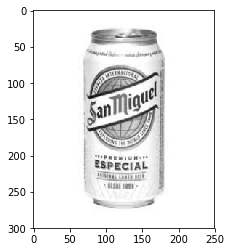

In [123]:
img_ancho = 250
img_alto = 300

for category in categories_test:
    path = os.path.join(DataDir_test, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array =cv2.resize(img_array, (img_ancho, img_alto))
        plt.imshow(new_array, cmap ='gray')
        plt.show


In [37]:
test_set

In [235]:
model.fit_generator(training_set,
steps_per_epoch = len(training_set), epochs=150)
#validation_split=0.1)
#validation_data = test_set, validation_steps=len(test_set)

Epoch 1/150
28/28 [==============================] - 6s 227ms/step - loss: 0.0797 - acc: 0.9754
Epoch 2/150
28/28 [==============================] - 7s 232ms/step - loss: 0.0490 - acc: 0.9830
Epoch 3/150
28/28 [==============================] - 7s 234ms/step - loss: 0.0613 - acc: 0.9830
Epoch 4/150
28/28 [==============================] - 7s 237ms/step - loss: 0.0866 - acc: 0.9726
Epoch 5/150
28/28 [==============================] - 7s 236ms/step - loss: 0.0559 - acc: 0.9810
Epoch 6/150
28/28 [==============================] - 7s 237ms/step - loss: 0.0532 - acc: 0.9855
Epoch 7/150
28/28 [==============================] - 7s 238ms/step - loss: 0.0674 - acc: 0.9754
Epoch 8/150
28/28 [==============================] - 7s 238ms/step - loss: 0.0755 - acc: 0.9751
Epoch 9/150
28/28 [==============================] - 7s 238ms/step - loss: 0.0609 - acc: 0.9743
Epoch 10/150
28/28 [==============================] - 7s 237ms/step - loss: 0.0574 - acc: 0.9863
Epoch 11/150
28/28 [===================

In [144]:
model.evaluate_generator(test_set, steps=len(test_set), verbose=1)

4/4 [==============================] - 1s 193ms/step


[0.16166335755381092, 0.9482758579583004]

In [202]:

prob_clasi = model.predict_generator(test_set, steps = len(test_set), max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

classes_1 = [np.argmax(prob_clasi[i]) for i in range(len(prob_clasi))]
np.argmax(prob_clasi[0])
test_set.class_indices

{'Amstel': 0,
 'Cruzcampo': 1,
 'Estrella_damm': 2,
 'Estrella_galicia': 3,
 'Franziskaner': 4,
 'Heineken': 5,
 'Mahou': 6,
 'Pilsen_urquell': 7,
 'Sanmiguel': 8}

In [258]:
prob_clasi[0]

array([2.6535126e-06, 9.9942243e-01, 5.2000100e-06, 1.6569491e-08,
       3.4774411e-10, 7.5393345e-08, 5.6436541e-04, 4.7134349e-06,
       5.3717548e-07], dtype=float32)

In [287]:
test_set.class_indices

for c, value in enumerate(test_set.class_indices, 0):
    print(c, value)

# Output:
# 1 apple
# 2 banana
# 3 grapes
# 4 pear

0 Amstel
1 Cruzcampo
2 Estrella_damm
3 Estrella_galicia
4 Franziskaner
5 Heineken
6 Mahou
7 Pilsen_urquell
8 Sanmiguel


In [284]:
prob_clasi[1]

array([1.3871511e-05, 5.6282324e-03, 2.5376714e-06, 3.0902874e-07,
       6.2879082e-04, 3.0368942e-06, 9.1015630e-05, 9.9169987e-01,
       1.9321679e-03], dtype=float32)

TypeError: ignored

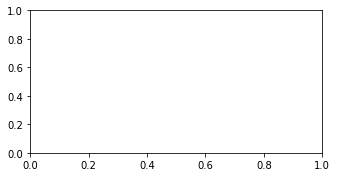

In [283]:
plt.figure(figsize=(200,100))
for i in range(0,32): 
  plt.subplot(32,32,i+1)
  print(prob_clasi[i].max())
  plt.imshow(test_set[0][0][i][:].reshape(300,250))
  #for name in test_set.class_indices:
   # if test_set.class_indices[name]==np.argmax(prob_clasi[i]):
    #  print(name)


In [213]:
type(test_set.class_indices)

dict

In [0]:
img_ancho = 250
img_alto = 300

for category in categories_test:
    path = os.path.join(DataDir_test, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array =cv2.resize(img_array, (img_ancho, img_alto))
        plt.imshow(new_array, cmap ='gray')
        plt.show

# from google.cloud import vision


In [0]:
def detect_labels(path):
    """Detects labels in the file."""
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.label_detection(image=image)
    labels = response.label_annotations
    print('Labels:')

    for label in labels:
        print(label.description)

In [0]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('my_webcam_gray', gray)
    #cv2.imshow('my_webcam_original', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# DETECTOR DE IMAGENES (google)

In [0]:
THRESHOLD = 0.8

class_names = {0: 'background',
              1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus',
              7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant',
              13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat',
              18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear',
              24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag',
              32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard',
              37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove',
              41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle',
              46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon',
              51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange',
              56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut',
              61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed',
              67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse',
              75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'microwave', 79: 'oven',
              80: 'toaster', 81: 'sink', 82: 'refrigerator', 84: 'book', 85: 'clock',
              86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush'}

model = cv2.dnn.readNetFromTensorflow('frozen_inference_graph.pb',
                                      'ssd_mobilenet_v2_coco_2018_03_29.pbtxt')

cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = cap.read()
    
    model.setInput(cv2.dnn.blobFromImage(frame, size=(300, 300), swapRB=True))
    
    output = model.forward()[0,0,:,:]
    
    for detection in output:
        confidence = detection[2]
        if confidence > THRESHOLD:
            class_id = detection[1]
            class_name = class_names[class_id]
            # print(confidence, class_name)
            
            # rectangles!
            
            box_x=detection[3]
            box_y=detection[4]
            box_width=detection[5]
            box_height=detection[6]
            
            height, width, ch = frame.shape
            
            box_x = detection[3] * width
            box_y = detection[4] * height
            box_width = detection[5] * width
            box_height = detection[6] * height
                                          
            cv2.rectangle(frame, 
                          (int(box_x),
                           int(box_y)),
                          (int(box_width),
                           int(box_height)),
                          (0, 0, 255), 
                          thickness=2)
            
            cv2.putText(frame, 
                        class_name + ' ' + str(round(confidence, 2)),
                        (int(box_x), 
                         int(box_y+.05*height)),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        1,
                        (0, 0, 255))
    
    cv2.imshow('object_detection', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()